### load data

In [26]:
require(tidyverse)
require(data.table)

glists <- list()
for(f in list.files("./dat/glists/","*.tsv")){
    if(!grepl("V2",f)){
        fn<- unlist(strsplit(f,"_"))[4]
        glists[[fn]] <- fread(paste0("./dat/glists/",f))
        glists[[fn]]$sources <- fn
    }
}

glists.df <- do.call(rbind,glists)%>%
    unite("category",c("subtype","sources"),remove = F)
all.cates <- unique(glists.df$category)

In [27]:
save(list = c("glists","glists.df"),file = './dat/glists/glists.Rdata')

In [28]:
# for GSEApy, create gsets 
fn=file("./dat/glists/gsea.gmt","w")
for(p in all.cates){
    cat(paste(c(p,'na',subset(glists.df,category==p)$gene),collapse =  "\t"),sep = "\n",file = fn)
}
close(fn)

### check whether we can find all genes 

In [29]:
# load all genes 
raw.res <- fread('./dat/alpha.100_bin_pseudotime_raw.promoter.txt')
all.genes <- colnames(raw.res)
rm(raw.res)
lapply(glists,function(x) data.frame(in.num=sum(x$gene %in% all.genes),tot.num=length(x$gene))%>%
       mutate(miss.num=tot.num-in.num))

in.num,tot.num,miss.num
486,651,165
in.num,tot.num,miss.num
173,213,40
in.num,tot.num,miss.num
369,444,75
in.num,tot.num,miss.num
3766,3766,0
in.num,tot.num,miss.num
495,495,0


### converted to ensembl id and then compare

### Venn intersection

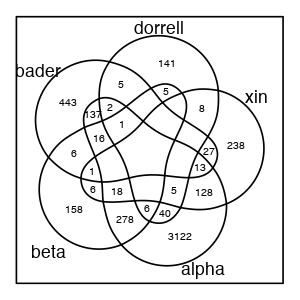

In [30]:
options(repr.plot.width =2.5, repr.plot.height = 2.5)
require(venn)
glists.sub1 <- sapply(names(glists),function(x) glists[[x]]$gene)
venn(glists.sub1,cexil = .5)

Not that imformative

In [31]:
str(glists)

List of 5
 $ bader  :Classes ‘data.table’ and 'data.frame':	651 obs. of  3 variables:
  ..$ gene   : chr [1:651] "SYNGAP1" "SMARCA1" "NHSL1" "ZDBF2" ...
  ..$ subtype: chr [1:651] "mature" "mature" "mature" "mature" ...
  ..$ sources: chr [1:651] "bader" "bader" "bader" "bader" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ dorrell:Classes ‘data.table’ and 'data.frame':	213 obs. of  3 variables:
  ..$ gene   : chr [1:213] "ST8SIA1" "ATP8A2" "HCN1" "CHD5" ...
  ..$ subtype: chr [1:213] "ST8SIA1+" "ST8SIA1+" "ST8SIA1+" "ST8SIA1+" ...
  ..$ sources: chr [1:213] "dorrell" "dorrell" "dorrell" "dorrell" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ xin    :Classes ‘data.table’ and 'data.frame':	444 obs. of  3 variables:
  ..$ gene   : chr [1:444] "RBP4" "SCGN" "FFAR4" "TMED6" ...
  ..$ subtype: chr [1:444] "Beta sub1" "Beta sub1" "Beta sub1" "Beta sub1" ...
  ..$ sources: chr [1:444] "xin" "xin" "xin" "xin" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ alpha  

### %Overlap  heatmap 

In [32]:

res.intersect <- lapply(all.cates,function(x1)
    sapply(all.cates,function(x2)
        length(intersect((glists.df%>%filter(category==x1))$gene,
                        (glists.df%>%filter(category==x2))$gene)
)))
names(res.intersect)<-all.cates
res.intersect.df <- do.call(rbind,res.intersect)
res.intersect.df

,mature_bader,immature_bader,ST8SIA1+_dorrell,ST8SIA1-_dorrell,CD9+_dorrell,CD9-_dorrell,Beta sub1_xin,Beta sub2_xin,Beta sub3_xin,Beta sub4_xin,A2_alpha,A1_alpha,B2_beta,B1_beta
mature_bader,72,0,0,0,0,1,0,0,0,0,12,0,2,0
immature_bader,0,579,3,3,0,1,1,0,0,40,153,4,21,1
ST8SIA1+_dorrell,0,3,46,0,0,0,0,4,0,1,11,2,0,2
ST8SIA1-_dorrell,0,3,0,65,0,0,1,0,0,1,13,3,1,3
CD9+_dorrell,0,0,0,0,45,0,3,0,0,0,9,3,1,2
CD9-_dorrell,1,1,0,0,0,57,0,2,1,0,11,2,3,0
Beta sub1_xin,0,1,0,1,3,0,13,0,0,0,3,3,0,1
Beta sub2_xin,0,0,4,0,0,2,0,28,0,0,4,2,0,1
Beta sub3_xin,0,0,0,0,0,1,0,0,13,0,3,1,0,0
Beta sub4_xin,0,40,1,1,0,0,0,0,0,390,147,1,23,0


In [33]:
require(reshape2)
pd.melt <- melt(round(res.intersect.df/diag(res.intersect.df)*100))
pd.melt$Var1 <- factor(pd.melt$Var1,levels = all.cates)
pd.melt$Var2 <- factor(pd.melt$Var2,levels = all.cates)
pd.melt.cnt <-melt(res.intersect.df)
pd.melt.cnt$Var1 <- factor(pd.melt.cnt$Var1,levels = all.cates)
pd.melt.cnt$Var2 <- factor(pd.melt.cnt$Var2,levels = all.cates)


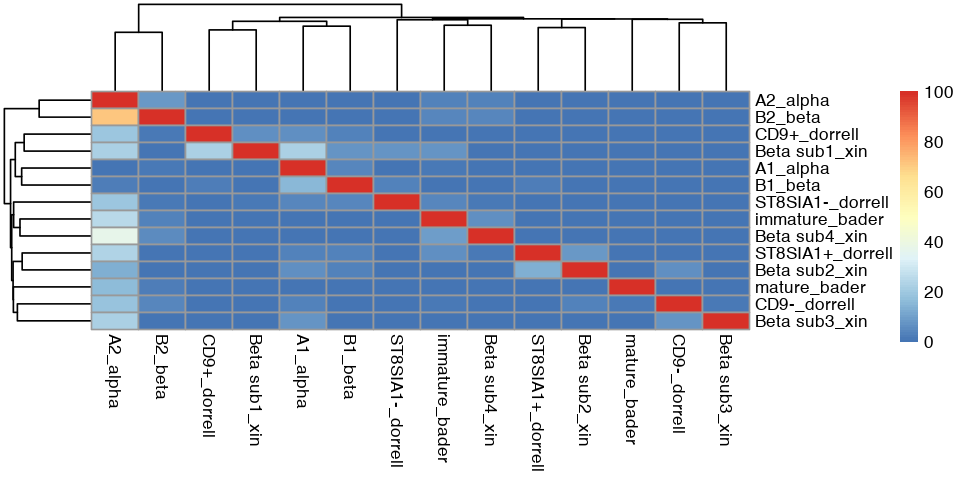

In [34]:
options(repr.plot.width =8, repr.plot.height = 4,repr.plot.scale=.5)
require(pheatmap)
pheatmap(round(res.intersect.df/diag(res.intersect.df)*100),scale="none")

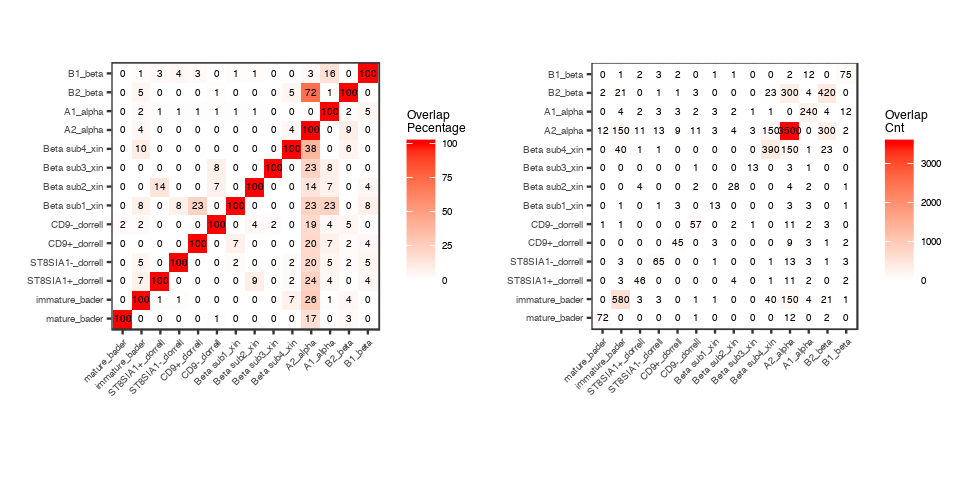

In [35]:
options(repr.plot.width =8, repr.plot.height = 4,repr.plot.scale=.5)
p1 <- ggplot(data = pd.melt, aes(Var2, Var1, fill = value))+
 geom_tile()+
 scale_fill_gradient(low = "white", high = "red", space = "Lab",
   name="Overlap\nPecentage") +
  theme_bw()+
    theme(text = element_text(size=7),axis.text.x = element_text(angle = 45, vjust = 1,  hjust = 1))+
coord_fixed()+ geom_text(aes(Var2, Var1, label = signif(value,2)), color = "black", size = 2)+xlab("")+ylab("")

p2 <- ggplot(data = pd.melt.cnt, aes(Var2, Var1, fill = value))+
 geom_tile()+
 scale_fill_gradient(low = "white", high = "red", space = "Lab",
   name="Overlap\nCnt") +
  theme_bw()+
    theme(text = element_text(size=7),axis.text.x = element_text(angle = 45, vjust = 1,  hjust = 1))+
coord_fixed()+ geom_text(aes(Var2, Var1, label = signif(value,2)), color = "black", size = 2)+xlab("")+ylab("")

require(ggpubr)
ggarrange(p1,p2,ncol=2)